# **Investigate Hotel Business using Data Visualization**   

---
# Stage 1: Data Preprocessing
---

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
print (pd.options.display.max_columns)
pd.options.display.max_columns = 50
print (pd.options.display.max_columns)

20
50


## Load Dataset

In [3]:
df = pd.read_csv('dataset/hotel_bookings_data.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


## Duplicated Value

In [4]:
df.duplicated().sum()

33261

Because there is no indication that the duplicate data comes from the same orderer, so there is nothing that can be done. So therefore I assume that it is from a different order even though it has the same value.

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Based on dataframe info, there are 86129 rows and 28 columns. There is 4 colomns that have null values, namely **children, city, agent, and company**.

In [6]:
numeric = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
categoric = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'customer_type', 'reservation_status']
df = df.astype({"is_canceled": bool, "arrival_date_year": object, "is_repeated_guest":bool})

In [7]:
print(len(numeric))
print(len(categoric))

17
11


In [8]:
df[numeric].describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- There is one colomn ('adr') that has a negative value, which will be analyzed further.
- There are columns that indicate skew, but nothing will be done to maintain the authenticity of the data.
- Columns adults, children, and babies have a minimum value of 0, this needs to be analyzed further because it could be that there are rooms where there are no guests.

In [9]:
df[categoric].describe()

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,city,market_segment,distribution_channel,is_repeated_guest,customer_type,reservation_status
count,119390,119390,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,2,3,12,5,177,8,5,2,4,3
top,City Hotel,False,2018,October,Breakfast,Kota Denpasar,Online TA,TA/TO,False,Personal,Check-Out
freq,79330,75166,56707,13877,92310,48590,56477,97870,115580,89613,75166


Based on the unique and top values, there are no unusual in the categoric colomn.

In [10]:
for i in categoric:
    print('=======================================================================================================')
    print(i, ':', len(df[i].unique()))
    print(i, ':', df[i].unique())

hotel : 2
hotel : ['Resort Hotel' 'City Hotel']
is_canceled : 2
is_canceled : [False  True]
arrival_date_year : 3
arrival_date_year : [2017 2018 2019]
arrival_date_month : 12
arrival_date_month : ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
meal : 5
meal : ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
city : 178
city : ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' nan 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi' 'Kota Jakarta Barat'
 'Kota Bengkulu' 'Kabupaten Bandung Barat' 'Kabupaten Bekasi'
 'Kabupaten Bogor' 'Kabupaten Ciamis' 'Kabupaten Cianjur'


There are several columns that have undefined values, namely 'meal', 'market_segment', 'distribution_channel'. This column will be analyzed further during data cleaning.

## Missing Value

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

There are 4 columns that have null values which will be handled as follows:
- 'children' will be **drop** because there are only 4
- 'city' will be filled with **unknown** because the city cannot be known
- 'agent' will be filled with the number **0**, to identify that the guest does not use a travel agency agent
- 'company' will be filled with the number **0**, to identify that the guest does not come from a company.

In [12]:
df['children'].dropna(inplace=True)
df['city'].fillna('unknown', inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          4
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Data Cleaning

### Undefined Value

- Colomn **Meal**

In [14]:
df['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

'Undefined' value in the colomn meal will be replace with 'No Meal', because it is assumed not to take meal packages.

In [15]:
df['meal'].replace('Undefined', 'No Meal', inplace=True)
df['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: count, dtype: int64

- Colomn **market_segment**

In [16]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

'Undefined' value in the colomn market_segment will be drop, because the number is very small.

In [17]:
df = df[df['market_segment'] != 'Undefined']
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64

- Colomn **distribution_channel**

In [18]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        3
Name: count, dtype: int64

'Undefined' value in the colomn distribution_channel will be drop, because the number is very small.

In [19]:
df = df[df['distribution_channel'] != 'Undefined']
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Name: count, dtype: int64

### Anomaly Value

- The number of guests

In [20]:
df['number_guests'] = df['adults'] + df['children'] + df['babies']
df['number_guests'].value_counts().sort_index()

number_guests
0.0       180
1.0     22581
2.0     82048
3.0     10493
4.0      3929
5.0       137
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: count, dtype: int64

0 value in the column distribution_channel will be dropped because the value doesn't make sense and the number is very small.

In [21]:
df = df[df['number_guests'] != 0]
df['number_guests'].value_counts().sort_index()

number_guests
1.0     22581
2.0     82048
3.0     10493
4.0      3929
5.0       137
6.0         1
10.0        2
12.0        2
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: count, dtype: int64

- Minus value at column adr

In [22]:
len(df[df['adr'] < 0])

1

Minus value will be drop, because the number is only 1.

In [23]:
df = df[df['adr'] >= 0]
len(df[df['adr'] < 0])

0

In [24]:
df[numeric].corr()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.127070,0.002281,0.085963,0.166882,0.117599,-0.037885,-0.021006,0.086024,-0.073613,0.002200,-0.013148,-0.085861,0.170008,-0.065054,-0.116639,-0.095921
arrival_date_week_number,0.127070,1.000000,0.066576,0.018664,0.016068,0.026562,0.005555,0.010418,0.035494,-0.020995,0.006345,-0.018198,-0.032912,0.022677,0.076281,0.001979,0.026184
arrival_date_day_of_month,0.002281,0.066576,1.000000,-0.016199,-0.028360,-0.001723,0.014562,-0.000240,-0.027034,-0.000297,0.011280,0.000147,0.003656,0.022525,0.030215,0.008598,0.003069
stays_in_weekend_nights,0.085963,0.018664,-0.016199,1.000000,0.494152,0.094773,0.046123,0.018610,-0.012766,-0.042893,0.050125,0.162379,-0.080782,-0.054399,0.050709,-0.018551,0.073146
stays_in_weekdays_nights,0.166882,0.016068,-0.028360,0.494152,1.000000,0.096219,0.044652,0.020375,-0.013976,-0.048894,0.079979,0.196757,-0.044436,-0.002024,0.066863,-0.024941,0.068754
adults,0.117599,0.026562,-0.001723,0.094773,0.096219,1.000000,0.029413,0.017893,-0.007067,-0.108859,-0.041472,0.023384,-0.166180,-0.008362,0.224310,0.014438,0.123324
children,-0.037885,0.005555,0.014562,0.046123,0.044652,0.029413,1.000000,0.024001,-0.024754,-0.021075,0.051013,0.050475,-0.042553,-0.033293,0.325063,0.056177,0.081724
babies,-0.021006,0.010418,-0.000240,0.018610,0.020375,0.017893,0.024001,1.000000,-0.007509,-0.006552,0.085609,0.030234,-0.009427,-0.010627,0.029040,0.037394,0.097945
previous_cancellations,0.086024,0.035494,-0.027034,-0.012766,-0.013976,-0.007067,-0.024754,-0.007509,1.000000,0.152572,-0.027261,-0.018252,-0.001111,0.005941,-0.065985,-0.018539,-0.048485
previous_bookings_not_canceled,-0.073613,-0.020995,-0.000297,-0.042893,-0.048894,-0.108859,-0.021075,-0.006552,0.152572,1.000000,0.011933,-0.046371,0.111223,-0.009415,-0.072322,0.047515,0.037788


### Correlation

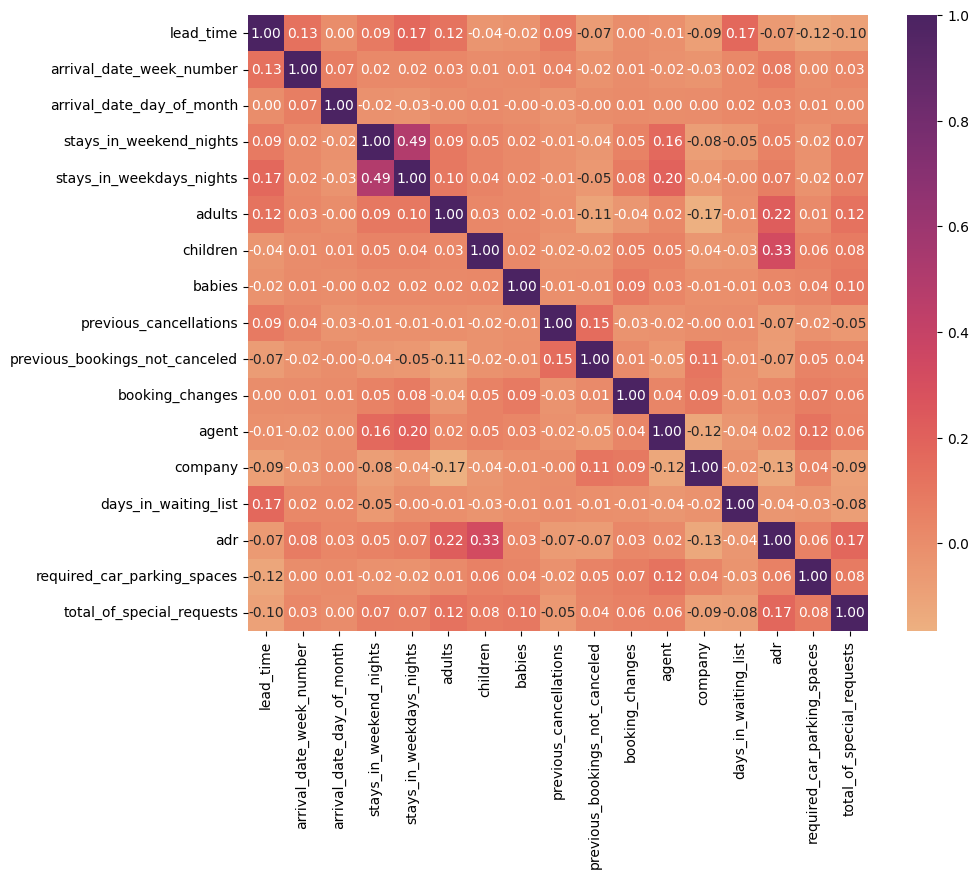

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric].corr(), cmap='flare', annot=True, fmt='.2f')
plt.show()

There is no unusual corr value.

---
# Stage 2: Monthly Hotel Booking Analysis Based On Hotel Type
---

### Comparison of the number of hotel bookings each month based on hotel type

In [26]:
monthly_booking = df.groupby(['arrival_date_month', 'hotel']).agg({
    'arrival_date_year' : ['count', 'nunique']
}).reset_index()
monthly_booking.columns = ['arrival_date_month', 'hotel', 'number_of_booked', 'number_of_year']
monthly_booking

,arrival_date_month,hotel,number_of_booked,number_of_year
0,April,City Hotel,4950,2
1,April,Resort Hotel,3102,2
2,August,City Hotel,7885,2
3,August,Resort Hotel,3044,2
4,December,City Hotel,7594,2
5,December,Resort Hotel,3553,2
6,February,City Hotel,4114,2
7,February,Resort Hotel,2645,2
8,January,City Hotel,4336,2
9,January,Resort Hotel,2435,2


Most of the months there are only 2 number_of_year, but in october and september there are 3 number_of_year so the count is no longer appropriate, and because of that normalization is necessary.

### Normalization

Because there are differences nunique so to normalization will use the average from number_of_booked/number_of_year

In [27]:
monthly_booking['average'] = np.floor(monthly_booking['number_of_booked']/monthly_booking['number_of_year'])
monthly_booking['average'] = monthly_booking['average'].astype(int)
monthly_booking

,arrival_date_month,hotel,number_of_booked,number_of_year,average
0,April,City Hotel,4950,2,2475
1,April,Resort Hotel,3102,2,1551
2,August,City Hotel,7885,2,3942
3,August,Resort Hotel,3044,2,1522
4,December,City Hotel,7594,2,3797
5,December,Resort Hotel,3553,2,1776
6,February,City Hotel,4114,2,2057
7,February,Resort Hotel,2645,2,1322
8,January,City Hotel,4336,2,2168
9,January,Resort Hotel,2435,2,1217


### Sort by Month

In [28]:
df['is_canceled'].value_counts()

is_canceled
False    75009
True     44195
Name: count, dtype: int64

In [29]:
sorted_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_booking['arrival_date_month'] = pd.Categorical(monthly_booking['arrival_date_month'], sorted_month)
monthly_booking.sort_values(['arrival_date_month', 'hotel'])

,arrival_date_month,hotel,number_of_booked,number_of_year,average
8,January,City Hotel,4336,2,2168
9,January,Resort Hotel,2435,2,1217
6,February,City Hotel,4114,2,2057
7,February,Resort Hotel,2645,2,1322
14,March,City Hotel,3730,2,1865
15,March,Resort Hotel,2191,2,1095
0,April,City Hotel,4950,2,2475
1,April,Resort Hotel,3102,2,1551
16,May,City Hotel,6434,2,3217
17,May,Resort Hotel,3333,2,1666


### Visualization of Monthly Hotel Booking

In [30]:
sns.set_palette("Set2")
sns.set_style("whitegrid")
colorArr = sns.color_palette("Set2")

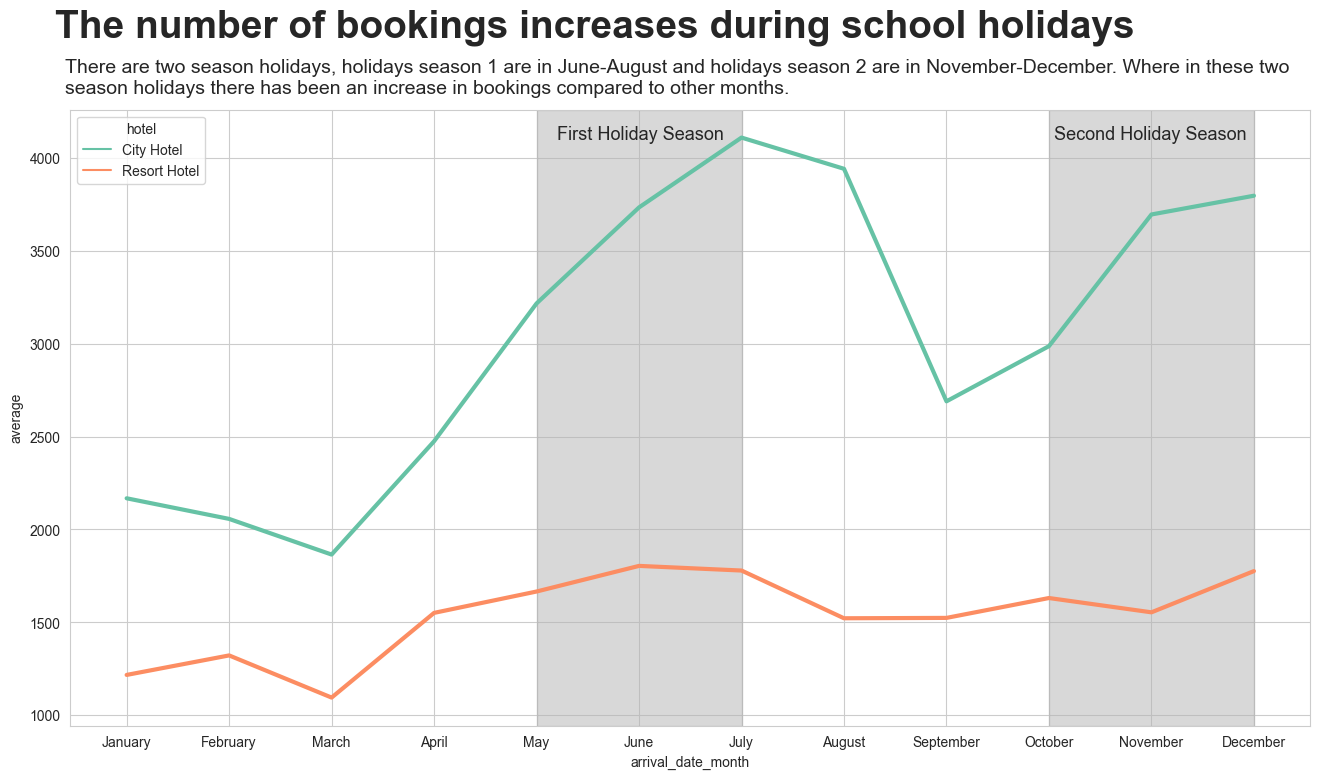

In [31]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x = "arrival_date_month", y = "average", hue = "hotel", data = monthly_booking, linewidth = 3)

plt.text(x = -0.7, y = 4650, 
         s = "The number of bookings increases during school holidays",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.6, y = 4350,
         s = "There are two season holidays, holidays season 1 are in June-August and holidays season 2 are in November-December. Where in these two \nseason holidays there has been an increase in bookings compared to other months.",
         fontsize = 14)

plt.text(x = 4.2, y = 4100,
         s = "First Holiday Season",
         fontsize = 13)

plt.text(x = 9.05, y = 4100,
         s = "Second Holiday Season",
         fontsize = 13)

ax.axvspan('May', 'July', color=colorArr[7], alpha=0.5)
ax.axvspan('October', 'December', color=colorArr[7], alpha=0.5)
plt.show()

Hotel reservations surge during the holiday season, with peak bookings occurring in July for City Hotels and June for Resort Hotels.

The first holiday season (May-July) aligns with a semester break, prompting numerous customers to book hotels as a means of alleviating stress from school, college, and work.

The second holiday season (October-December) spans both a semester break and the New Year, same as the stress-relief trend in the first holiday season, this holiday season also prompts numerous customers to book hotels.

Apart from the holiday season (January-April and August-September), the level of hotel bookings has decreased compared to the holiday season, this is because the holiday period has ended and most customers have returned to focusing on school, college, or work activities.

---
# Stage 3: Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates
---

## Duration of Stay

In [32]:
df['total_duration_ofStay'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,number_guests,total_duration_ofStay
0,Resort Hotel,False,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,False,0,0,3,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0,0
1,Resort Hotel,False,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,False,0,0,4,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0,0
2,Resort Hotel,False,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,False,0,0,0,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1
3,Resort Hotel,False,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,False,0,0,0,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1
4,Resort Hotel,False,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,False,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,False,0,0,0,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2.0,7
119386,City Hotel,False,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,False,0,0,0,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3.0,7
119387,City Hotel,False,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,False,0,0,0,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2.0,7
119388,City Hotel,False,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,False,0,0,0,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2.0,7


In [33]:
df['total_duration_ofStay'].value_counts().sort_index()

total_duration_ofStay
0       645
1     21004
2     27630
3     27064
4     17373
5      7770
6      3846
7      8647
8      1155
9       840
10     1134
11      393
12      220
13      141
14      913
15       72
16       40
17       20
18       35
19       22
20       14
21       71
22       13
23        8
24        6
25       37
26        6
27        4
28       34
29       13
30       13
33        3
34        1
35        5
38        1
42        4
45        1
46        1
48        1
56        2
60        1
69        1
Name: count, dtype: int64

There are 645 booked with a 0-night duration of stay, it is assumed the guest only booked the room for a short break and checked out before the day changed.

Because there are many variances in the duration of stays (0-69 days), to make it simpler and easier to interpret so the duration of stays will be grouped as follows:
- 1 week: 0-7 days
- 2 weeks: 8-14 days
- 3 weeks: 15-21 days
- More than 3 weeks: > 21 days

In [34]:
df["total_duration_ofStay"] = np.where(df["total_duration_ofStay"] <= 7, '1 week', 
                                        (np.where(df["total_duration_ofStay"] <= 14 , '2 weeks', 
                                        (np.where(df["total_duration_ofStay"] <= 21 , '3 weeks', 
                                        (np.where(df["total_duration_ofStay"] > 21 , 'More than 3 weeks', 'Invalid Value')))))))

In [35]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,number_guests,total_duration_ofStay
0,Resort Hotel,False,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,False,0,0,3,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0,1 week
1,Resort Hotel,False,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,False,0,0,4,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out,2.0,1 week
2,Resort Hotel,False,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,False,0,0,0,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1 week
3,Resort Hotel,False,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,False,0,0,0,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1.0,1 week
4,Resort Hotel,False,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,False,0,0,0,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2.0,1 week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2019,October,35,30,2,5,2,0.0,0,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,False,0,0,0,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,2.0,1 week
119386,City Hotel,False,102,2019,October,35,31,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,False,0,0,0,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,3.0,1 week
119387,City Hotel,False,34,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,False,0,0,0,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,2.0,1 week
119388,City Hotel,False,109,2019,October,35,31,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,False,0,0,0,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,2.0,1 week


In [36]:
df['total_duration_ofStay'].value_counts()

total_duration_ofStay
1 week               113979
2 weeks                4796
3 weeks                 274
More than 3 weeks       155
Name: count, dtype: int64

## Cancelation Rate based on Total duration of stays

In [37]:
cancelationRate_durationStays = df.groupby(['total_duration_ofStay', 'hotel', 'is_canceled']).agg({
    'is_canceled' : ['count']
}).reset_index()
cancelationRate_durationStays.columns = ['duration_ofStay', 'hotel','is_canceled', 'number_of_booked']
temp = cancelationRate_durationStays.groupby(['duration_ofStay', 'hotel']).agg({'number_of_booked':'sum'}).reset_index()
cancelationRate_durationStays = pd.merge(cancelationRate_durationStays, temp, on=['duration_ofStay', 'hotel'])
cancelationRate_durationStays.columns = ['duration_ofStay', 'hotel', 'is_canceled', 'number_of_booked', 'number_of_booked_byDuration']
cancelationRate_durationStays['percentage'] = cancelationRate_durationStays.apply(lambda x: float(x['number_of_booked'])/float(x['number_of_booked_byDuration'])*100, axis=1)
cancelationRate_durationStays

,duration_ofStay,hotel,is_canceled,number_of_booked,number_of_booked_byDuration,percentage
0,1 week,City Hotel,False,45538,77938,58.428494
1,1 week,City Hotel,True,32400,77938,41.571506
2,1 week,Resort Hotel,False,26124,36041,72.484115
3,1 week,Resort Hotel,True,9917,36041,27.515885
4,2 weeks,City Hotel,False,511,1069,47.801684
5,2 weeks,City Hotel,True,558,1069,52.198316
6,2 weeks,Resort Hotel,False,2649,3727,71.075932
7,2 weeks,Resort Hotel,True,1078,3727,28.924068
8,3 weeks,City Hotel,False,29,105,27.619048
9,3 weeks,City Hotel,True,76,105,72.380952


## Visualization of Cancelation Rate (duration of stays)

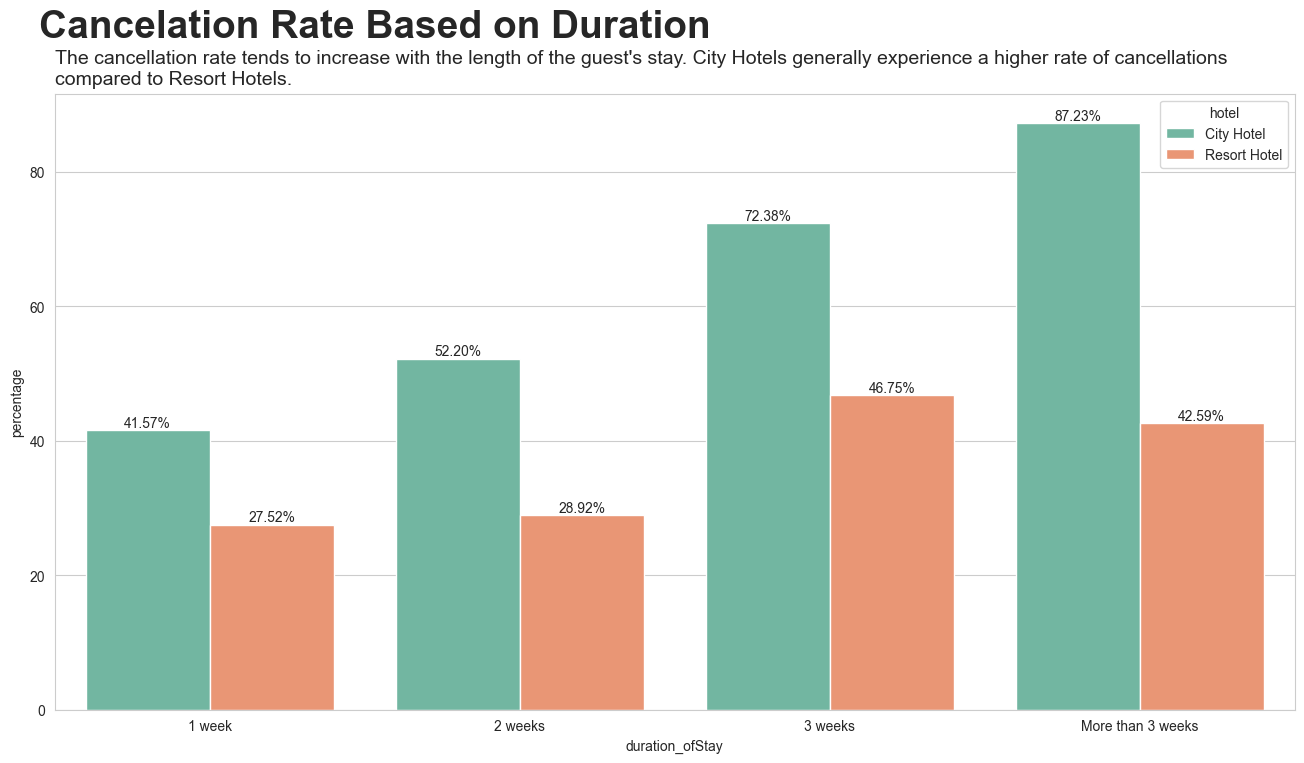

In [38]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='duration_ofStay', y='percentage', data=cancelationRate_durationStays[cancelationRate_durationStays['is_canceled']==True], hue='hotel')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')
plt.text(x = -0.55, y = 100, 
         s = "Cancelation Rate Based on Duration",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.5, y = 93,
         s = "The cancellation rate tends to increase with the length of the guest's stay. City Hotels generally experience a higher rate of cancellations \ncompared to Resort Hotels.",
         fontsize = 14)
plt.show()

The likelihood of cancellations generally rises with the length of the guest's stay, experiencing a notable increase when the stay duration is three weeks. Several reasons can make this phenomenon happen such as, prolonged stays often leading to heightened guest expectations. Then, the potential for changing plans increases with longer durations, as guests may reconsider and alter their plans, resulting in a higher probability of cancellations.

The City Hotel experiences the highest cancellation rate, especially when the stay duration exceeds three weeks, reaching 87.23%. This alarming trend warrants special attention as nearly every booking is canceled. My assumption is that in the City most guests an employees/businessmen, consisting mainly of employees or businessmen staying overnight for work-related purposes. It is likely that, once their work is completed or plans change, there is a reduced need for extended stays. However, further research is necessary to validate this assumption.

The Resort Hotel records its highest cancellation rate at 46.75% when the duration of stays spans three weeks, which is nearly half the rate observed in City Hotels. An assumption can be made that, in resorts, a significant portion of guests book for vacation purposes, leading to a lower likelihood of cancelation.

---
# Stage 4: Impact Analysis Of Lead Time On Hotel Bookings Cancellation Rate
---

## Category Lead Time

In [45]:
df['lead_time'].value_counts().sort_index()

lead_time
0      6264
1      3443
2      2064
3      1815
4      1710
       ... 
622      17
626      30
629      17
709       1
737       1
Name: count, Length: 479, dtype: int64

Because there are many variances in the lead time (0-737 days), to make it simpler and easier to interpret so the lead time will be grouped every 2 month (60 days)
- 1-2 Month: 0-60 days
- 3-4 Month: 61-120 days
- 5-6 Month: 121-180 days
- 7-8 Month: 181-240 days 
- 9-10 Month: 241-300 days
- 11-12 Month: 301-360 days
- '>12 Month': >360 days

In [55]:
def group2month(x):
    if x < 61:
        return '1-2 Month'
    elif x < 121:
        return '3-4 Month'
    elif x < 181:
        return '5-6 Month'
    elif x < 241:
        return '7-8 Month'
    elif x < 301:
        return '9-10 Month'
    elif x < 361:
        return '11-12 Month'
    else:
        return '>12 Month'

In [58]:
df['lead_time_month'] = df['lead_time'].apply(lambda x: group2month(x))

In [59]:
df['lead_time_month'].value_counts().sort_index()

lead_time_month
1-2 Month      55528
11-12 Month     4536
3-4 Month      23005
5-6 Month      15991
7-8 Month       9967
9-10 Month      6735
>12 Month       3442
Name: count, dtype: int64

In [77]:
lead_time_month = df.groupby(['lead_time_month', 'hotel', 'is_canceled']).aggregate({
    'is_canceled' : ['count']
}).reset_index()
lead_time_month.columns = ['lead_time_month', 'hotel', 'is_canceled', 'number_of_booked']
temp = lead_time_month.groupby(['lead_time_month', 'hotel']).agg({'number_of_booked':'sum'}).reset_index()
lead_time_month = pd.merge(lead_time_month, temp, on=['lead_time_month', 'hotel'])
lead_time_month.columns = ['lead_time_month', 'hotel', 'is_canceled', 'number_of_booked', 'number_of_booked_byLeadTime']
lead_time_month['percentage'] = lead_time_month.apply(lambda x: float(x['number_of_booked'])/float(x['number_of_booked_byLeadTime'])*100, axis=1)
lead_time_month

,lead_time_month,hotel,is_canceled,number_of_booked,number_of_booked_byLeadTime,percentage
0,1-2 Month,City Hotel,False,25326,35114,72.125078
1,1-2 Month,City Hotel,True,9788,35114,27.874922
2,1-2 Month,Resort Hotel,False,16864,20414,82.609974
3,1-2 Month,Resort Hotel,True,3550,20414,17.390026
4,11-12 Month,City Hotel,False,743,3396,21.878681
5,11-12 Month,City Hotel,True,2653,3396,78.121319
6,11-12 Month,Resort Hotel,False,625,1140,54.824561
7,11-12 Month,Resort Hotel,True,515,1140,45.175439
8,3-4 Month,City Hotel,False,9166,16344,56.081743
9,3-4 Month,City Hotel,True,7178,16344,43.918257


In [78]:
sorted_leadTimeMonth = ['1-2 Month', '3-4 Month', '5-6 Month', '7-8 Month', '9-10 Month', '11-12 Month', '>12 Month']
lead_time_month['lead_time_month'] = pd.Categorical(lead_time_month['lead_time_month'], sorted_leadTimeMonth)
lead_time_month.sort_values(['lead_time_month', 'hotel'])

,lead_time_month,hotel,is_canceled,number_of_booked,number_of_booked_byLeadTime,percentage
0,1-2 Month,City Hotel,False,25326,35114,72.125078
1,1-2 Month,City Hotel,True,9788,35114,27.874922
2,1-2 Month,Resort Hotel,False,16864,20414,82.609974
3,1-2 Month,Resort Hotel,True,3550,20414,17.390026
8,3-4 Month,City Hotel,False,9166,16344,56.081743
9,3-4 Month,City Hotel,True,7178,16344,43.918257
10,3-4 Month,Resort Hotel,False,4227,6661,63.458940
11,3-4 Month,Resort Hotel,True,2434,6661,36.541060
12,5-6 Month,City Hotel,False,5506,10764,51.151988
13,5-6 Month,City Hotel,True,5258,10764,48.848012


## Visualization of Cancelation Rate (Lead Time)

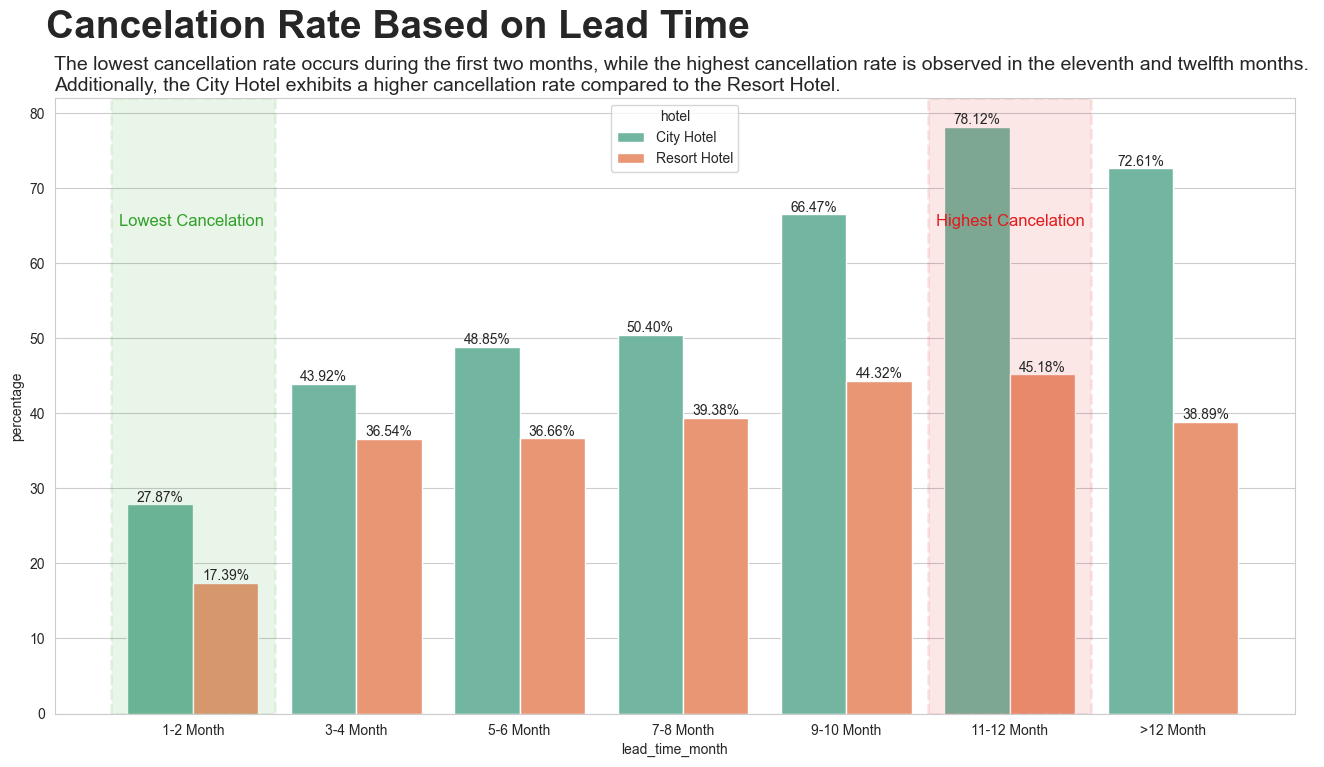

In [151]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='lead_time_month', y='percentage', data=lead_time_month[lead_time_month['is_canceled']==True], hue='hotel')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')
plt.text(x = -0.9, y = 90, 
         s = "Cancelation Rate Based on Lead Time",
         fontsize = 28, weight = 'bold')

plt.text(x = -0.85, y = 83,
         s = "The lowest cancellation rate occurs during the first two months, while the highest cancellation rate is observed in the eleventh and twelfth months. \nAdditionally, the City Hotel exhibits a higher cancellation rate compared to the Resort Hotel.",
         fontsize = 14)

ax.axvspan(-0.5, 0.5, color=sns.color_palette("Paired")[3], alpha=0.1, linestyle='--', linewidth=2)
ax.axvspan(4.5, 5.5, color=sns.color_palette("Paired")[5], alpha=0.1, linestyle='--', linewidth=2)

plt.text(x = -0.45, y = 65,
         s = "Lowest Cancelation",
         fontsize = 12, color=sns.color_palette("Paired")[3])

plt.text(x = 4.55, y = 65,
         s = "Highest Cancelation",
         fontsize = 12, color=sns.color_palette("Paired")[5])

plt.show()

The City Hotel and Resort Hotel experienced their lowest cancellation rates during the first two months, with 27.87% and 17.39%, respectively. This phenomenon may be attributed to guests making urgent and necessary bookings within a short timeframe so the likelihood of cancellations during this period is low.

The highest cancellation rates are observed in the eleventh and twelfth months for both the City Hotel (78.12%) and the Resort Hotel (45.18%). This trend may be attributed to the long timeframe, leading to changes in guests' plans so they cancel their booking.

The City Hotel exhibits a higher cancellation rate compared to the Resort Hotel. This difference is likely influenced by the nature of guests at each location. In the City Hotel, where the majority of guests are employees or businessmen staying overnight for work-related reasons, frequent changes in plans may occur due to completed assignments or other work-related factors. On the other hand, the Resort Hotel where the majority of guests book for vacation purposes, has fixed plans and dates for vacation, and consequently, a lower frequency of cancellations.